# DS Batch 2020 Quiz - Python

**Student Name: Zhengkun Ye (English Name: Mark)

**Student Email: Zhengkunye@gmail.com / zye15@stevens.edu
 

## Question 1: Data Access

An often encountered step to data pre-processing usually involves querying data that exists within a relational database system. Typically such data may be transactional in nature, and as a result, it is optimized for a relational data model. While this format is critical for performance, efficient storage, and quick updates, it is often not suitable for data science work. In this next question, you will be asked to access data from a fictitious relational database and perform query operations to get it into a suitable format for analysis. The required output for this question is the correct SQL code and query results, you may use any dialect of SQL you wish, but submissions in any other language will be considered incorrect.

You have been granted access to a database that contains two tables; `Order_Detail` and `Product_Detail` that are stored in a relational format.  `Order_Detail` contains transactional information and possesses the following schema:

#### Table Order_Detail Schema

> **invoice_id:** The unique id for each transaction.
>
> **invoice_line:** A unique id for each item sold with each transaction (ie, multiple items can be purchased with each invoice.)
>
> **store_id:** The store where transaction took place.
>
> **time_stamp:** The date of the purchase.
>
> **product:** The unique id for the product sold within the transaction (every product sold has a unique product id.)
>
> **units:** The number of the products sold with the transaction (ie, you could purchase 2 of the same item.)
>
> **sales:** The gross sales for the item sold.
>
> **cogs:** The cost of the item sold (i.e. not the cost to the customer, but the cost to the business for the product.)

| invoice_id | invoice_line | store_id | time_stamp | product | units | sales  | cogs  | 
|------------|--------------|----------|------------|---------|-------|--------|-------| 
| 10000001   | 31215        | 3        | 9/3/17     | 3000    | 1     | 99.99  | 58.00 | 
| 10000001   | 31216        | 3        | 9/3/17     | 3354H   | 3     | 32.99  | 18.00 | 
| 10000002   | 91455        | 1        | 9/5/17     | 1234    | 2     | 24.99  | 20.00 | 
| 10000003   | 59943        | 2        | 9/5/17     | 3000    | 1     | 19.99  | 14.99 | 
| 10000004   | 95027        | 2        | 9/5/17     | 18518   | 1     | 9.99   | 3.00  | 
| 10000005   | 73994        | 2        | 9/5/17     | 12HA12  | 15    | 3.99   | 1.99  | 
| 10000006   | 98464        | 1        | 10/1/17    | wh30000 | 1     | 199.99 | 75.00 | 


#### Table Product_Detail Schema
> **product:** The unique id for the product sold within the transaction (every product sold has a unique product id.)
>
> **cat_name:** The listed name for a given product category.
>
> **key_internal:** No documentation exists for this field. 

| product | cat_name | key_internal|
|---------|--------- |  ---------  |
| 3000    | WidgetA  |  17375273   |
| 3354H   | WidgetB  |  15477787   |
| 1234    | WidgetC  |  97845235   |
| 18518   | WidgetD  |  47813334   |
| 12HA12  | WidgetD  |  48573988   |
| wh30000 | WidgetE  |  00000000   |

Your task is to construct a single SQL query that returns the following results:

> Summarized total sales, total quantity sold, and total profit (which can be calculated as total sales less cogs) by the week number, store id, product category name.  It is important to note that in this business, the week begins on a *Tuesday*.  

*Hint:*  The week number is the week portion of a date value, from 0 to 53. 



The following SQL code has been provided if you choose to create these tables in a test database.

```sql
--clean up existing tables
DROP TABLE IF EXISTS Order_Detail;
DROP TABLE IF EXISTS Product_Detail;

--create order table and populate records
CREATE TABLE IF NOT EXISTS Order_Detail (
    invoice_id INTEGER NOT NULL,
    invoice_line INTEGER NOT NULL,
    store_id INTEGER NOT NULL,
    time_stamp DATE NOT NULL,
    product VARCHAR(8) NOT NULL,
    units INTEGER NOT NULL,
    sales NUMERIC(7 , 2 ) NOT NULL,
    cogs NUMERIC(5 , 2 ) NOT NULL
);

INSERT INTO Order_Detail(invoice_id,invoice_line,store_id,time_stamp,product,units,sales,cogs) VALUES (10000001,31215,3,'2017/09/03','3000',1,99.99,58.00);
INSERT INTO Order_Detail(invoice_id,invoice_line,store_id,time_stamp,product,units,sales,cogs) VALUES (10000001,31216,3,'2017/09/03','3354H',3,32.99,18.00);
INSERT INTO Order_Detail(invoice_id,invoice_line,store_id,time_stamp,product,units,sales,cogs) VALUES (10000002,91455,1,'2017/09/05','1234',2,24.99,20.00);
INSERT INTO Order_Detail(invoice_id,invoice_line,store_id,time_stamp,product,units,sales,cogs) VALUES (10000003,59943,2,'2017/09/05','3000',1,19.99,14.99);
INSERT INTO Order_Detail(invoice_id,invoice_line,store_id,time_stamp,product,units,sales,cogs) VALUES (10000004,95027,2,'2017/09/05','18518',1,9.99,3.00);
INSERT INTO Order_Detail(invoice_id,invoice_line,store_id,time_stamp,product,units,sales,cogs) VALUES (10000005,73994,2,'2017/09/10','12HA12',15,3.99,1.99);
INSERT INTO Order_Detail(invoice_id,invoice_line,store_id,time_stamp,product,units,sales,cogs) VALUES (10000006,98464,1,'2017/10/01','wh30000',1,199.99,75.00);

--create product table and populate records
CREATE TABLE IF NOT EXISTS Product_Detail (
    product VARCHAR(8) NOT NULL,
    cat_name VARCHAR(8) NOT NULL,
    key_interal VARCHAR(8) NOT NULL
);

INSERT INTO Product_Detail(product,cat_name,key_interal) VALUES ('3000','WidgetA','17375273');
INSERT INTO Product_Detail(product,cat_name,key_interal) VALUES ('3354H','WidgetB','15477787');
INSERT INTO Product_Detail(product,cat_name,key_interal) VALUES ('1234','WidgetC','97845235');
INSERT INTO Product_Detail(product,cat_name,key_interal) VALUES ('18518','WidgetD','47813334');
INSERT INTO Product_Detail(product,cat_name,key_interal) VALUES ('12HA12','WidgetD','48573988');
INSERT INTO Product_Detail(product,cat_name,key_interal) VALUES ('wh30000','WidgetE','00000000');
```

In [3]:
#Answer to question 1 goes here

##MySQL

####Doing it seperately:
use details;
select cat_name,sum((sales-cogs)*units) as total_profit from 
(select * from Order_Detail full join Product_Detail using (product))
 as c group by cat_name;

select store_id, sum(units) as total_quantity from
Order_Detail group by store_id;

select week_number, sum(sales*units)as total_sales from 
(select sales,units, week(time_stamp,2) as week_number from details.Order_Detail)
as total group by week_number;

####Doing it in one query:
select week(time_stamp, 2) as week_num, store_id, cat_name
    , sum(sales) as total_sales
       , sum(units) as total_quantity
       , sum(sales-cogs) as total_profit
from
(select * from Order_Detail join Product_Detail using(product)) t
group by week(time_stamp, 2), store_id, cat_name

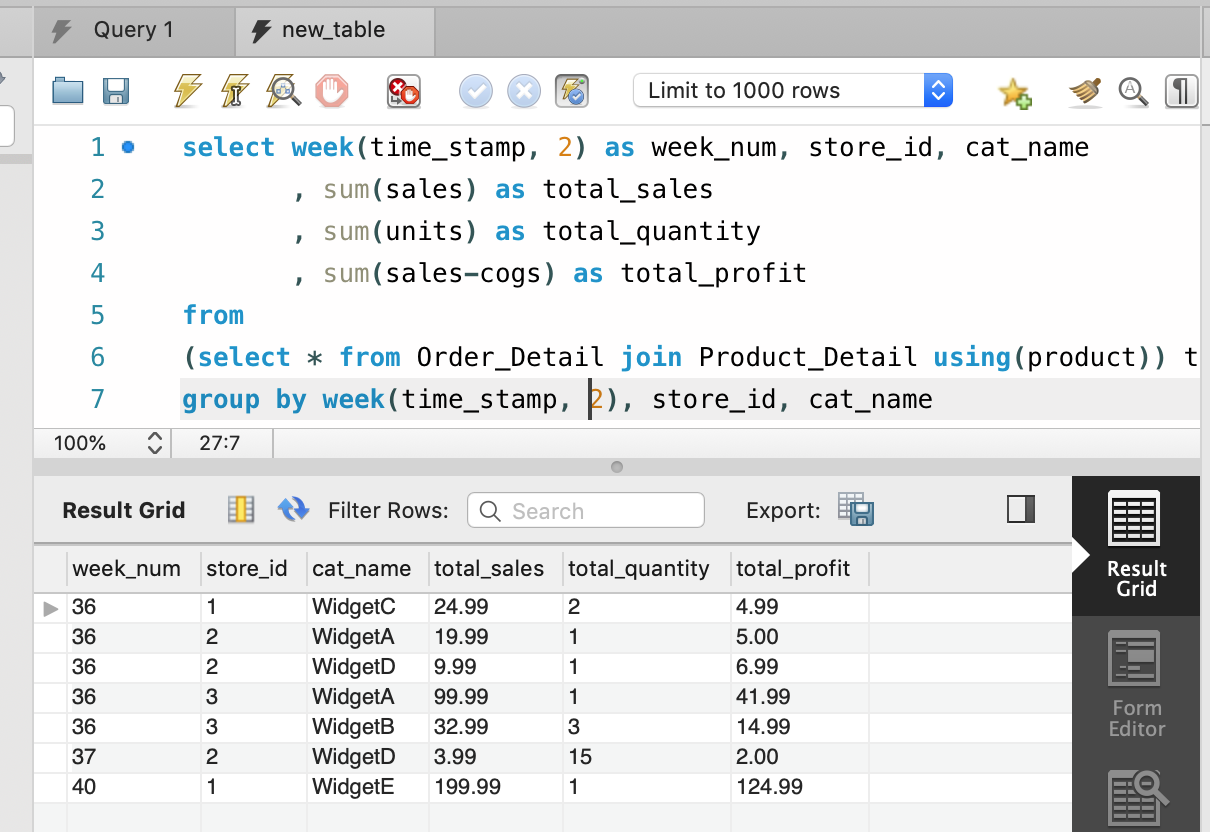

## Question 2
How would you use Python to access the above data and perform these operations?

In [4]:
# Either use the code or the human language to answer question 2 here.

## Use $ python3 -m pip install PyMySQL


## Question 3: Data Transformation

Another common task is to take data that may not be in a usable format and 'wrangle' it into a better representation.  This next question will test your ability to clean and order data.

You have been presented with two dataframes: 

#### Dataframe A: Product Attributes
This dataframe contains two columns; the first one is a unique product ID represented by an integer, the second is a string containing a collection of attributes assigned to that product.  

| product | tags                 |
|---------|----------------------|
| 100     | chocolate, sprinkles |
| 101     | chocolate, filled    |
| 102     | glazed               |


#### Dataframe B: Purchase History
The second dataframe contains two columns as well; the first one is a string that contains a customer name, the second is an integer that contains a product number.  The product IDs from column two are the same as the product IDs from column one of dataframe A.

| customer | product |
|----------|---------|
| A        | 100     |
| A        | 101     |
| B        | 101     |
| C        | 100     |
| C        | 102     |
| B        | 101     |
| A        | 100     |
| C        | 102     |

You are asked to create a dataframe matching this format, where the contents of the cells represent the count of occurrences of product attribute by customer.  

| customer | chocolate | sprinkles | filled | glazed |
|----------|-----------|-----------|--------|--------|
| A        | ?         | ?         | ?      | ?      |
| B        | ?         | ?         | ?      | ?      |
| C        | ?         | ?         | ?      | ?      |


After you have completed your code, evaluate it for performance bottlenecks and describe how you would improve the code.  



In [39]:
import sys
!{sys.executable} -m pip install pandas
import pandas as pd

tableA = [(100, 'chocolate, sprinkles'),
         (101, 'chocolate, filled'),
         (102, 'glazed')]
labels = ['product', 'tags']
dfA = pd.DataFrame.from_records(tableA, columns = labels)

tableB = [('A', 100),
           ('A', 101),
           ('B', 101),
           ('C', 100),
           ('C', 102),
           ('B', 101),
           ('A', 100),
           ('C', 102)]
labels = ['customer', 'product']
dfB = pd.DataFrame.from_records(tableB, columns = labels)


You should consider upgrading via the 'pip install --upgrade pip' command.


In [38]:
#Answer to question 3 goes here
temp1 = dfA.copy()
n = len(dfA)
for i in range(n):
    if len(dfA.loc[i,'tags'].split(",")) > 1:
        dfA.loc[i,'tags'] = dfA.loc[i,'tags'].split(", ")[0]
        temp1.loc[i,'tags'] = temp1.loc[i,'tags'].split(", ")[1]
        dfA=dfA.append(temp1.loc[i],ignore_index = True)
dfC = pd.merge(dfB,dfA,on = "product").pivot_table(index ='customer', columns ='tags', values ='product',aggfunc ='sum').fillna(0).astype(int)
dfC['customer'] = dfC.index.values.tolist()
order = ['customer','chocolate','sprinkles','filled','glazed']
dfC = dfC[order]

dfC.columns.name = None
dfC = dfC.reset_index(drop = True)

print(dfC)

  customer  chocolate  sprinkles  filled  glazed
0        A        301        200     101       0
1        B        202          0     202       0
2        C        100        100       0     204


## Question 4
If the two starting tables were in a relational database or Hadoop cluster and each had a 100 million rows, how might your approach change?

In [7]:
# Either use the code or the human language to answer question 2 here.

##The most common practice to size a Hadoop cluster is sizing the cluster based on the amount of storage required. 
##The more data into the system, the more will be the machines required. 
##MapReduce can best be described as a programming model used to develop Hadoop-based applications 
##that can process massive amounts of unstructured data.

## Question 5: Hypothesis Testing
This question will test your statistical and reasoning abilities.  You have been asked to analyze the results of a randomized, controlled experiment on a fictitious website and provide a recommendation.  For this experiment, each visitor to the site is randomly exposed to one of four different product images; visitors are then tracked to see which ones make a purchase or not.  Based on the data provided, which version of the image should be selected to be presented to all visitors and why?

| image | visitors | purchases 
|----------|-----------|----------|
| A        | 21        | 3        | 
| B        | 180       | 30       | 
| C        | 250       | 50       | 
| D        | 100       | 15       | 


In [8]:
#Answer to question 5 goes here, if you need please use markdown

## I think the version C of the image should be selected to be presented to all vistors, 
## because image C has the most numbers of visitors and the most numbers of purchases as well.
## Also, the image C has the highest purchase/visitor rate, which is 0.2.

## Question 6
How would your analysis change if the visitors and purchase counts numbered in the millions? 

In [9]:
#Answer to question 6 goes here

##The purpose of hypothesis testing is to determine whether there is enough statistical evidence 
##in favor of a certain belief, or hypothesis, about a parameter.
##Hypothesis testing is an act in statistics whereby an analyst tests an assumption regarding a population parameter. 
##Hypothesis testing is used to assess the plausibility of a hypothesis by using sample data.
##Hypothesis testing traditionally focused on p values to derive statistical significance when alpha is less than 0.05 has a major weakness. 
##That is with a large enough sample size any experiment can eventually reject the null hypothesis 
##and detect trivially small differences that turn out to be statistically significant.
##The large sample will reduce the standard error to close to zero. 
##This in turn will artificially boost the t stat and commensurately lower the p value to close to 0%.

##小样本需要同时考虑样本量和概率。大样本的时候可直接比较概率。

## Question 7: Model Evaluation

In this scenario, you have been presented with the following model summary and asked to evaluate a candidate multiple linear regression model.  Using the diagnostic output and correlation matrix below, determine what is wrong with this model and explain your findings.  

*Note:* All of the response and explanatory variables are continuous.

**Model Output**

<table style="text-align:center"><caption><h3>Multiple Linear Regression Results</h3></caption>
<tr><td colspan="2" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left"></td><td><em>Dependent variable: Y1</em></td></tr>
<tr><td style="text-align:left">Coefficent</td><td>Estimate (Standard Error)  </td><td> p value</td></tr>
<tr><td style="text-align:left">Intercept</td><td>73.539 (-37.905, 184.983)  </td><td> <em>p= 0.21</em></td></tr>
<tr><td style="text-align:left">X1</td><td>0.127 (-0.073, 0.326)  </td><td> <em>p=0.22</em></td></tr>
<tr><td style="text-align:left">X2</td><td>4.184 (-1.664, 10.031) </td><td>  <em>p=0.17</em></td></tr>
<tr><td style="text-align:left">X3</td><td>-4.964 (-10.966, 1.038) </td><td>  <em>p=0.12</em></td></tr>
<tr><td style="text-align:left">X4</td><td>-0.665 (-2.980, 1.651) </td><td>  <em>p=0.58</em></td></tr>
<tr><td style="text-align:left">X5</td><td>3.855<sup>***</sup> (1.885, 5.824) </td><td>   <em>p=0.01</em></td></tr>
<tr><td style="text-align:left">X6</td><td>0.675 (-0.958, 2.308)   </td><td><em>p=0.42</em></td></tr>
<tr><td style="text-align:left">X7</td><td>-0.389 (-3.395, 2.616)   </td><td><em>p=0.80</em></td></tr>
<tr><td style="text-align:left">X8</td><td>0.077 (-0.034, 0.189)   </td><td><em>p=0.18</em></td></tr>
<tr><td colspan="2" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">N Observations</td><td>38</td></tr>
<tr><td style="text-align:left">R<sup>2</sup></td><td>0.529</td></tr>
<tr><td style="text-align:left">Adjusted R<sup>2</sup></td><td>0.400</td></tr>
<tr><td style="text-align:left">Residual Std. Error</td><td>11.908 (df = 29)</td></tr>
<tr><td style="text-align:left">F Statistic</td><td>4.080<sup>***</sup> (df = 8; 29)  <em>p=0.01</em> </td></tr>
</table>


**Correlation Matrix**

The table below shows the correlation coefficients for all possible pairs of variables.



|   .     | X1     | X2    | X3     | X4     | X5     | X6     | X7     | X8     | Y1     |
|--------|--------|-------|--------|--------|--------|--------|--------|--------|--------|
| **X1** | 1      | 0.081 | -0.079 | -0.09  | -0.17  | 0.36   | 0.091  | -0.042 | 0.205  |
| **X2** | 0.081  | 1     | 0.828  | 0.829  | 0.776  | 0.698  | 0.573  | 0.784  | -0.64  |
| **X3** | -0.079 | 0.828 | 1      | 0.998  | 0.93   | 0.752  | 0.725  | 0.908  | -0.797 |
| **X4** | -0.09  | 0.829 | 0.998  | 1      | 0.928  | 0.752  | 0.735  | 0.91   | -0.799 |
| **X5** | -0.17  | 0.776 | 0.93   | 0.928  | 1      | 0.625  | 0.607  | 0.812  | -0.731 |
| **X6** | 0.36   | 0.698 | 0.752  | 0.752  | 0.625  | 1      | 0.671  | 0.754  | -0.585 |
| **X7** | 0.091  | 0.573 | 0.725  | 0.735  | 0.607  | 0.671  | 1      | 0.65   | -0.591 |
| **X8** | -0.042 | 0.784 | 0.908  | 0.91   | 0.812  | 0.754  | 0.65   | 1      | -0.787 |
| **Y1** | 0.205  | -0.64 | -0.797 | -0.799 | -0.731 | -0.585 | -0.591 | -0.787 | 1      |





In [ ]:
# Answer to question 7 goes here

##Multiple regression is an extension of simple linear regression. 
##It is used when we want to predict the value of a variable based on the value of two or more other variables. 
##The variable we want to predict is called the dependent variable.
##Multiple linear regression attempts to model the relationship between two or more explanatory variables, 
##and a response variable by fitting a linear equation to observed data. 
##Every value of the independent variable x is associated with a value of the dependent variable y. 

##多元线性回归的前提假设是自变量之间的独立性，题目里的自变量之间相关性太高了。
##Multiple regression models describe how a single response variable Y depends linearly on a number of predictor variables. 

## Question 8
Describe how the above model can be improved. 

In [ ]:
# Answer to question 8 goes here

##In the multiple linear regression model, R square measures the goodness of fit.
##The value of R square would not decrease when more variables are added to the model.

##Add interaction terms to model how two or more independent variables together impact the target variable.
##Add polynomial terms to model the nonlinear relationship between an independent variable and the target variable.
##Add spines to approximate piecewise linear models.

##去掉一些共线性高的自变量，还有对自变量做主成分分析。

##For this problem, take off the high correlation independent variables and only keep one X. 
##X is more close to 1 or -1, X would be independent variable with higher correlation.

## Question 9: Data Analysis

The internet startup ShinyFancyObjects is looking to make its IPO in the next couple months.  Before doing so, its founders are presenting their company to potential investors and analysts with the goal of generating a higher company valuation before going public.  As a Data Scientist at one of these investment firms, you have been asked to help evaluate ShinyFancyObjects and determine if it would be a good investment.  

You have been provided two resources to help with your analysis; a company fact sheet provided by ShinyFancyObjects, and a table containing data about their customer history.  Using these two pieces of information, determine if this company would be a good long-term investment, and explain why or why not.


**ShinyFancyObjects Fact Sheet; The Hottest Startup Since Facebook**

* ShinyFancyObjects posses a customer file of nearly twenty thousand unique customers.  
* Since its launch in January 2016, ShinyFancyObjects is growing its customer base by 10%.
* There was a new feature release in November of 2016, which was a huge hit with our customers, resulting in a 46% increase in new customers from the prior month.  
* The company predicts it will more than double its customer base in the next year.  
* The January 2017 gain for new customers was a 120% improvement over of January of 2016. 
* Since January of 2016, ShinyFancyObjects has grown its customer base by 1,841%.
* ShinyFancyObjects boasts a customer retention rate of 58%.  

**Customer History**

This table shows new customers acquired by month, along with how many of those same customers remained active in the following months.  As an example, in January 2016, 1,098 new customers were acquired.  One month later, out of the initial 1,098, only 875 were still active, two months later, 800 were active, and so on.  Whereas in February of 2016, 1,358 new customers were acquired, of which 500 were still active six months after. 

| Cohort | Month 0 | Month 1  | Month 2 | Month 3 | Month 4 | Month 5 | Month 6 | Month 7 | Month 8 | Month 9 | Month 10 | Month 11 | Month 12 | Month 13 | 
|--------|---------|----------|---------|---------|---------|---------|---------|---------|---------|---------|----------|----------|----------|----------| 
| Jan-16 | 1098    | 875      | 800     | 765     | 552     | 421     | 403     | 382     | 367     | 341     | 295      | 244      | 201      | 185      | 
| Feb-16 | 1358    | 1019     | 996     | 826     | 713     | 524     | 500     | 495     | 389     | 301     | 257      | 178      | 133      |          | 
| Mar-16 | 1257    | 892      | 741     | 705     | 648     | 498     | 395     | 205     | 168     | 132     | 121      | 84       |          |          | 
| Apr-16 | 1587    | 1174     | 924     | 838     | 699     | 354     | 205     | 158     | 104     | 79      | 55       |          |          |          | 
| May-16 | 1758    | 1213     | 1000    | 751     | 605     | 305     | 165     | 111     | 90      | 65      |          |          |          |          | 
| Jun-16 | 1624    | 1137     | 954     | 754     | 403     | 248     | 205     | 165     | 100     |         |          |          |          |          | 
| Jul-16 | 1541    | 1002     | 874     | 621     | 322     | 201     | 168     | 105     |         |         |          |          |          |          | 
| Aug-16 | 868     | 521      | 499     | 400     | 158     | 118     | 75      |         |         |         |          |          |          |          | 
| Sep-16 | 1143    | 629      | 451     | 384     | 205     | 100     |         |         |         |         |          |          |          |          | 
| Oct-16 | 1253    | 639      | 338     | 255     | 117     |         |         |         |         |         |          |          |          |          | 
| Nov-16 | 1835    | 899      | 241     | 107     |         |         |         |         |         |         |          |          |          |          | 
| Dec-16 | 2155    | 862      | 205     |         |         |         |         |         |         |         |          |          |          |          | 
| Jan-17 | 2422    | 848      |         |         |         |         |         |         |         |         |          |          |          |          | 
| Feb-17 | 2531    |          |         |         |         |         |         |         |         |         |          |          |          |          | 



In [ ]:
# Answer to question 9 goes here

##I think we may use Cohort Analysis to deal with this problem.
##Personally speaking, I would do the short-term investment rather than the long-term investment since the details are not enough.

##Retention rate is mentioned as 58% whereas the time or period infos were missing.

##User viscosity is a key for the long term development.
##But the user viscosity is not good as the chart shows that in 6 months more than 50% users are lost.

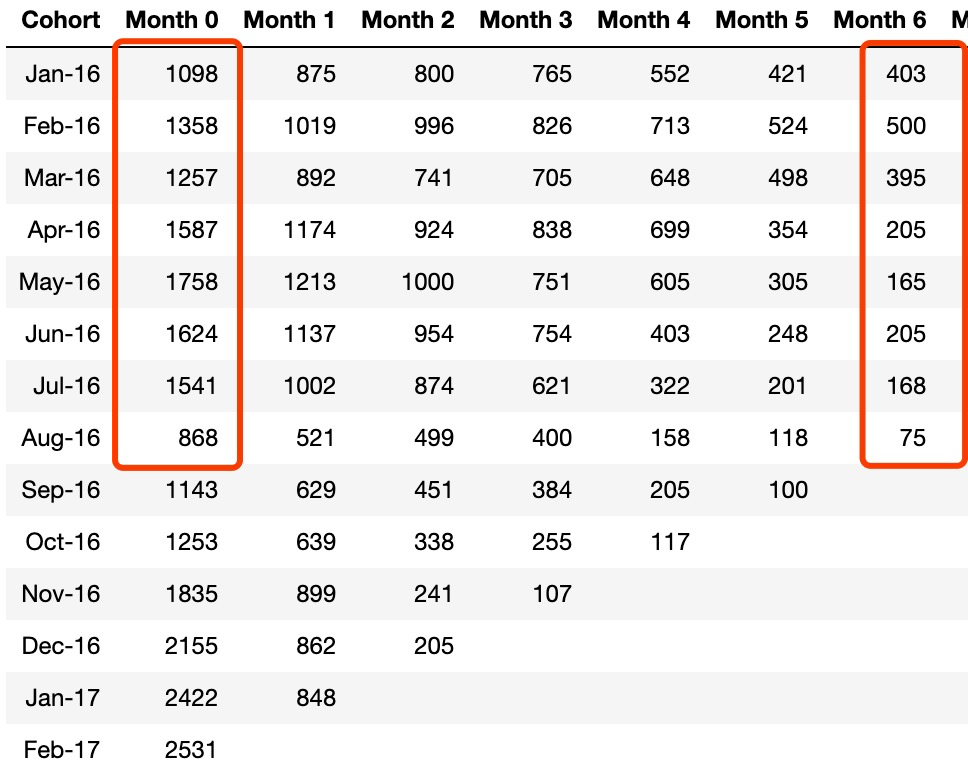

## Question 10
What other data sources would be helpful in making your recommendation? 

In [ ]:
# Answer to question 10 goes here

##CAC (Customer Acquisition)
##LTV (Life Time Value)
##PBP (Payback Period)

##Expense or possible welcome offer situation for new customers.
##Budget for marketing and ads.
##How ShinyFancyObjects gets or attracts new customers.
##Net promoter score set by company.

##Etc.